# DSCI 100 Group Project Proposal
Group 18: Brooklyn Wang, Mahir Patel, Ashmit Ghai, Mark Cao

### Introduction:
In this project, we are aiming to apply the use of classification and regression for predicting the outcomes of real-life datasets. In our project, we will be conducting a classification problem.
This data contains different features, such as size, form, shape and structure for seven different species of beans.
With this dataset, we are trying to identify the feature(s) with the most apparent and direct relationships to the types of beans they correspond to, and trying to build a classifier from those features to predict types of beans from its various features.

### Preliminary exploratory data analysis:
1. Demonstrate that the dataset can be read from the web into R 
2. Clean and wrangle your data into a tidy format
3. Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
4. Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

We will now load necessary libraries and read in the dataset from the web into R.

In [2]:
library(tidyverse)
library(readxl)
library(repr)
library(tidymodels)
library(dplyr)               

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [27]:
bean_data <- read_csv("https://raw.githubusercontent.com/Mark20050713/group_18/main/dry-bean-dataset.csv")
head(bean_data)

Rows: 13611 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Class
dbl (16): Area, Perimeter, MajorAxisLength, MinorAxisLength, AspectRation, E...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
28395,610.291,208.1781,173.8887,1.197191,0.5498122,28715,190.1411,0.7639225,0.9888560,0.9580271,0.9133578,0.007331506,0.003147289,0.8342224,0.9987239,SEKER
28734,638.018,200.5248,182.7344,1.097356,0.4117853,29172,191.2728,0.7839681,0.9849856,0.8870336,0.9538608,0.006978659,0.003563624,0.9098505,0.9984303,SEKER
29380,624.110,212.8261,175.9311,1.209713,0.5627273,29690,193.4109,0.7781132,0.9895588,0.9478495,0.9087742,0.007243912,0.003047733,0.8258706,0.9990661,SEKER
30008,645.884,210.5580,182.5165,1.153638,0.4986160,30724,195.4671,0.7826813,0.9766957,0.9039364,0.9283288,0.007016729,0.003214562,0.8617944,0.9941988,SEKER
30140,620.134,201.8479,190.2793,1.060798,0.3336797,30417,195.8965,0.7730980,0.9908932,0.9848771,0.9705155,0.006697010,0.003664972,0.9419004,0.9991661,SEKER
30279,634.927,212.5606,181.5102,1.171067,0.5204007,30600,196.3477,0.7756885,0.9895098,0.9438518,0.9237260,0.007020065,0.003152779,0.8532696,0.9992358,SEKER


As we can see here, our dataset has all the requirements to be called a tidy dataset, where each row is a single observation, each column is a single variable, and each cell contains only one value. However, because we are going to be using K-nearest neighbour classification in this project, we want the bean type column (Class) to be a factor, instead of characters, since there are only 7 categories possible (ie. the 7 bean types used in this dataset).

In [28]:
bean_data_tidy <- mutate(bean_data, Class = as_factor(Class))
head(bean_data_tidy)

Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
28395,610.291,208.1781,173.8887,1.197191,0.5498122,28715,190.1411,0.7639225,0.9888560,0.9580271,0.9133578,0.007331506,0.003147289,0.8342224,0.9987239,SEKER
28734,638.018,200.5248,182.7344,1.097356,0.4117853,29172,191.2728,0.7839681,0.9849856,0.8870336,0.9538608,0.006978659,0.003563624,0.9098505,0.9984303,SEKER
29380,624.110,212.8261,175.9311,1.209713,0.5627273,29690,193.4109,0.7781132,0.9895588,0.9478495,0.9087742,0.007243912,0.003047733,0.8258706,0.9990661,SEKER
30008,645.884,210.5580,182.5165,1.153638,0.4986160,30724,195.4671,0.7826813,0.9766957,0.9039364,0.9283288,0.007016729,0.003214562,0.8617944,0.9941988,SEKER
30140,620.134,201.8479,190.2793,1.060798,0.3336797,30417,195.8965,0.7730980,0.9908932,0.9848771,0.9705155,0.006697010,0.003664972,0.9419004,0.9991661,SEKER
30279,634.927,212.5606,181.5102,1.171067,0.5204007,30600,196.3477,0.7756885,0.9895098,0.9438518,0.9237260,0.007020065,0.003152779,0.8532696,0.9992358,SEKER


### Data Summary (of Training Set):


In [29]:
# Split the dataset into training and testing sets.
bean_split <- initial_split(bean_data_tidy, prop = 0.75, strata = Class)

bean_training <- training(bean_split)
bean_testing <- testing(bean_split)


# Summarize the training dataset in a table.
bean_summary <- bean_training |>
    group_by(Class) |> 
    summarize(Count = n(), across(everything(), median)) |> 
    rename_with(~ paste0("mean_", .), -Class, -Count)

bean_summary

Class,mean_Count,mean_Area,mean_Perimeter,mean_MajorAxisLength,mean_MinorAxisLength,mean_AspectRation,mean_Eccentricity,mean_ConvexArea,mean_EquivDiameter,mean_Extent,mean_Solidity,mean_roundness,mean_Compactness,mean_ShapeFactor1,mean_ShapeFactor2,mean_ShapeFactor3,mean_ShapeFactor4
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SEKER,1515,39215.0,721.729,249.1774,200.2620,1.236640,0.5883001,39595.0,223.4504,0.7739884,0.9908862,0.9510516,0.8986584,0.006367694,0.002536339,0.8075870,0.9986381
BARBUNYA,1002,69232.5,1039.327,369.2545,239.2667,1.547024,0.7629966,70468.5,296.8999,0.7513303,0.9832042,0.8041573,0.8026440,0.005345077,0.001375113,0.6442375,0.9963619
BOMBAY,396,172843.5,1591.361,594.1561,372.9538,1.588585,0.7770070,175418.5,469.1174,0.7847620,0.9882576,0.8651622,0.7899021,0.003439651,0.000821165,0.6239453,0.9924548
CALI,1224,74658.0,1054.560,408.5153,235.3745,1.734422,0.8170541,75843.5,308.3140,0.7666534,0.9862523,0.8466451,0.7553437,0.005468831,0.001092931,0.5705441,0.9912960
HOROZ,1443,53799.0,922.249,374.3287,183.7247,2.036723,0.8711682,54561.0,261.7232,0.6994539,0.9871355,0.7961095,0.6979057,0.006977552,0.001026228,0.4870723,0.9938497
SIRA,1972,44659.5,796.213,298.7488,190.9937,1.561237,0.7679434,45215.5,238.4580,0.7512741,0.9885508,0.8865522,0.7984860,0.006693124,0.001677237,0.6375799,0.9959701
DERMASON,2654,31963.0,665.691,247.0024,165.8123,1.485574,0.7395147,32351.5,201.7339,0.7537737,0.9887023,0.9120704,0.8192750,0.007701342,0.002125738,0.6712115,0.9973777


### Preliminary Data Visualization:


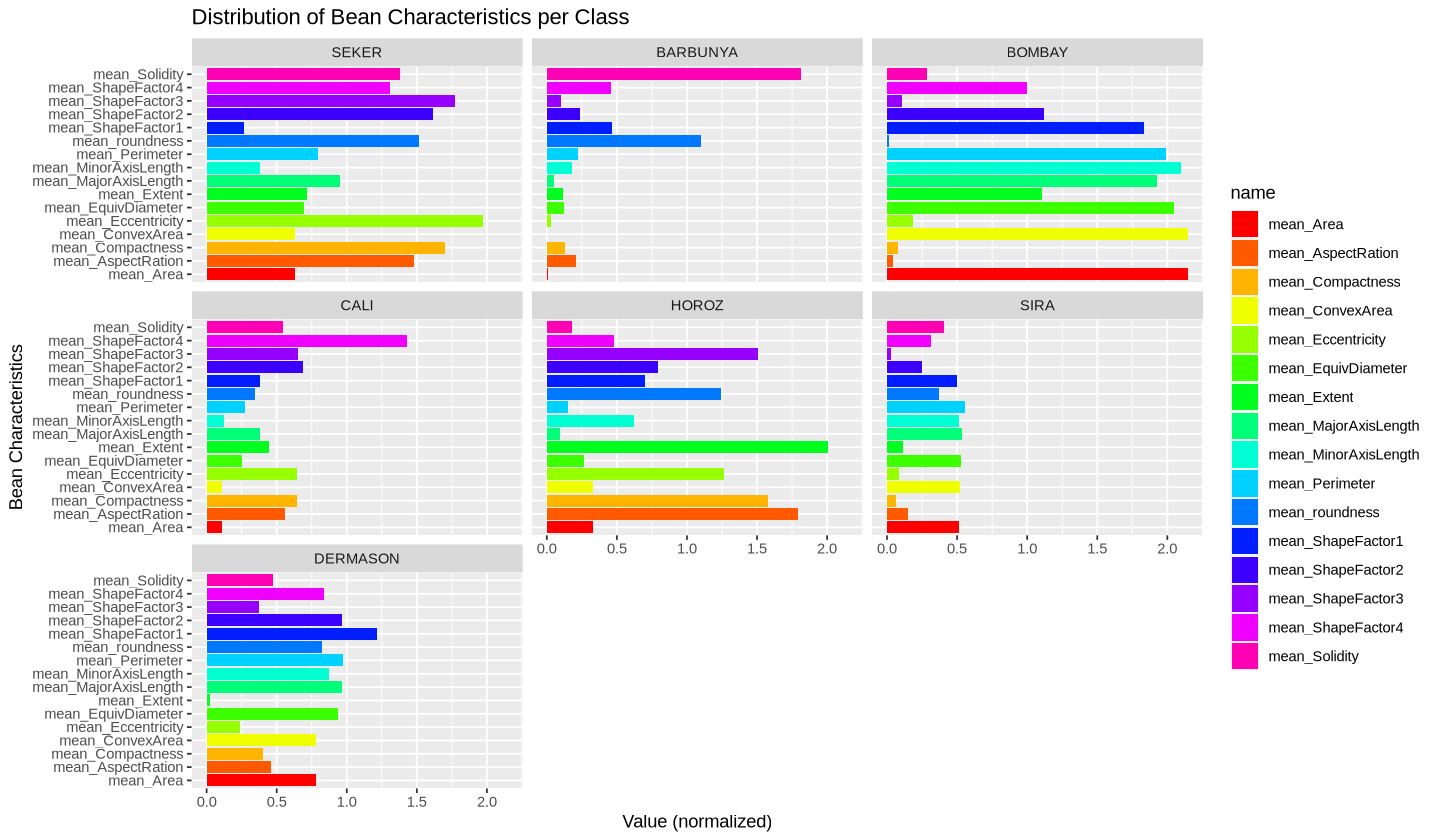

In [30]:
rainbow_colors <- rainbow(17)

VARIABLES <- c("mean_Area", "mean_Perimeter","mean_MajorAxisLength","mean_MinorAxisLength",
               "mean_AspectRation", "mean_Eccentricity", "mean_ConvexArea", "mean_EquivDiameter",
               "mean_Extent", "mean_Solidity", "mean_roundness", "mean_Compactness", "mean_ShapeFactor1",
               "mean_ShapeFactor2",	"mean_ShapeFactor3", "mean_ShapeFactor4")

# Visualize the training dataset with a plot.
options(repr.plot.width = 12, repr.plot.height = 7)

bean_summary_classes <- bean_summary |>
    select(Class)

bean_summary_norms <- bean_summary |>
    select(all_of(VARIABLES)) |>
    mutate(across(everything(), scale)) |>
    mutate(across(everything(), abs))

bean_summary_long <- bind_cols(bean_summary_classes, bean_summary_norms) |>
    pivot_longer(cols = -Class, names_to = "name", values_to = "value")

bean_visualization <- bean_summary_long |>
    ggplot(aes(x = name, y = value, fill = name)) +
        geom_bar(stat = "identity") +
        facet_wrap(~Class, ncol = 3) +
        labs(x = "Bean Characteristics", y = "Value (normalized)", title = "Distribution of Bean Characteristics per Class") +
        theme(axis.text.y = element_text(angle = 0, hjust = 1)) +
        scale_fill_manual(values = rainbow_colors) + 
        coord_flip()

bean_visualization
     

### Methods:
We will use the "Class" column as the classifier in our KNN model since we are trying to predict what type of bean a new observation is. The class of the bean can be any of "BARBUNYA", "SIRA", "HOROZ", "DERMASON", "CALI", "BOMBAY", and "SEKER".

We are also planning on using "Area" and "AspectRation". "Area" in this data set is determined as the area of a bean zone and the number of pixels within its boundaries. "AspectRation" is the ratio between "MajorAxisLength" (the height of the bean) and "MinorAxisLength" (the width of the bean). We think these predictors might be useful in trying to classify the beans because they are all slightly different shapes and sizes. However, the "Roundness" column might also be useful because beans are 3D objects and their roundness might differ based on their bean type.

To visualize our results, we will create a scatterplot that has a coloured prediction map visualization that distinguishes the classes predicted by the model as shaded regions on the plot based on two predictors.

### Expected outcomes and significance:
We anticipate identifying clear patterns and relationships between the physical attributes of beans (aspect ratio, area, roundness) and their Class (e.g., Seker, Bombay). This could enable precise classification of bean varieties using these attributes. Such findings could significantly improve agricultural sorting processes, enhance quality control in food production, and contribute to the academic understanding of crop characteristics. This study may open avenues for exploring other physical and perhaps genetic markers for crop classification, leading to advancements in agricultural technology and food science.